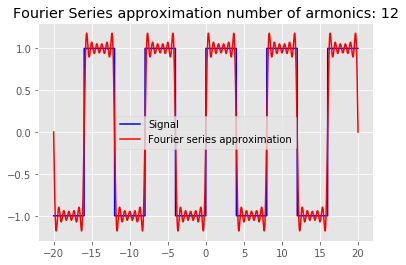

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as sp
import pandas as pd
from scipy import fftpack
import pylab as pl
from numpy import fft
from scipy.fftpack import fft, ifft

#I will fill in this program with our parameters on gaspowers and first start with 8655 and fill in the amplutide, freq etc which all belong to fourier

plt.style.use("ggplot")

# Setup
x_ = np.linspace(-20,20,10000)

T = 8
armonics = 12

def squareWave(x):
    global T
    lowerBoundLeft = (-T/2)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    one = 1
    negativeOne = -1

    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return one
        else:
            lowerBoundLeft -= T/2
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if one == 1:
                one = -1
                negativeOne = 1
            else:
                one = 1
                negativeOne = -1

# Bn coefficients
def bn(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0

# Wn
def wn(n):
    global T
    wn = (2*np.pi*n)/T
    return wn

# Fourier Series function
def fourierSeries(n_max,x):
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
        try:
            partialSums = partialSums + bn(n)*np.sin(wn(n)*x)
        except:
            print("pass")
            pass
    return partialSums


y = []
f = []
for i in x_:
    y.append(squareWave(i))
    f.append(fourierSeries(armonics,i))


plt.plot(x_,y,color="blue",label="Signal")
plt.plot(x_,f,color="red",label="Fourier series approximation")
plt.title("Fourier Series approximation number of armonics: "+str(armonics))
plt.legend()
plt.show()

In [31]:
data = h[['eMeter', 'ePower', 'gasMeter', 'gasPower', 'T', 'Q']]

In [36]:
dir = '//datc//opschaler//combined_gas_smart_weather_dfs//processed//'
dwelling_id = 'P01S01W5855_hour'
h = pd.read_csv(dir+dwelling_id+'.csv', delimiter='\t', parse_dates=['datetime'])
h = h.set_index(['datetime'])
h.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,RG,SQ,T,T10,TD,U,VV,WW,dwelling,gasPower
datetime,,,,,,,,,,,,,,,,,,,,,
2017-03-07 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2073.335,283.46667,0.0,2.076667,...,0.0,0.0,5.516667,4.400000,4.916666,95.166664,10295.000,4.666666,P01S01W5855,NaN
2017-03-07 08:00:00,2458.056,0.0,2370.064,0.0,477.85837,0.0,2073.933,273.10000,0.0,2.106667,...,0.0,0.0,5.933333,5.083334,5.216667,94.500000,10565.000,3.333333,P01S01W5855,0.598145
2017-03-07 09:00:00,2458.288,0.0,2370.064,0.0,232.49167,0.0,2074.427,281.45000,0.0,2.453333,...,0.0,0.0,6.466667,5.966667,5.800000,95.000000,11416.667,2.000000,P01S01W5855,0.493896
2017-03-07 10:00:00,2459.166,0.0,2370.064,0.0,880.23050,0.0,2074.991,282.10000,100.0,2.848333,...,0.0,0.0,7.016666,6.866667,5.916666,92.000000,11550.000,23.333334,P01S01W5855,0.563965
2017-03-07 11:00:00,2459.424,0.0,2370.064,0.0,251.95273,0.0,2075.398,286.85000,2.0,4.028333,...,0.0,0.0,7.566667,7.716667,6.183333,90.500000,13883.333,32.500000,P01S01W5855,0.406982


In [32]:
def datetime_layout():
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
x = data.index

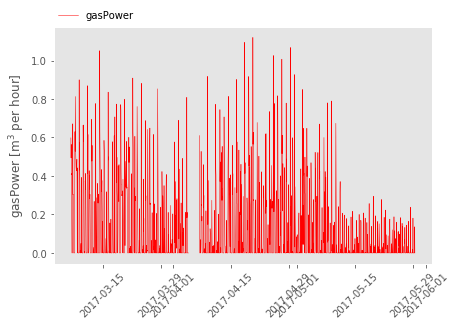

In [33]:
fig, ax = plt.subplots()
datetime_layout()

ax.plot(x, data['gasPower'], 'r-', linewidth=0.5, label='gasPower')
ax.set_ylabel('gasPower [m$^3$ per hour]')
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), borderaxespad=0, frameon=False)

In [34]:
plt.show()